In [92]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 
import json
import os
from tqdm import tqdm

In [4]:
ann_dir = '../prediction_detection/array_all_predicted/prediction_array_all_v6/ann_all/'
im_dir = './all_transformed_images/'

ann_paths = os.listdir(ann_dir)

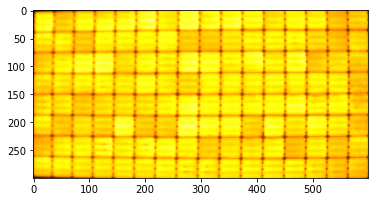

In [94]:
path = ann_paths[112]
name = path.split('.')[0]

image = cv.imread(im_dir+name+'.png')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [93]:
def draw_rec(ann_path, image, color, thickness=3):
    with open(ann_path, 'r') as file:
        data = json.load(file)
    if len(data['objects']) > 0:
        for obj in data['objects']:
            classTitle = obj['classTitle']
            points = obj['points']['exterior']

            cv.rectangle(image, tuple(points[0]), tuple(points[1]), color[classTitle], thickness)


In [81]:
color = {
    'crack_bbox_yolo': (60, 124, 90), # green
    'solder_bbox_yolo': (190, 112, 78), # blue
    'oxygen_bbox_yolo': (40, 64, 183), # red
    'intra_bbox_yolo': (103, 52, 154) # purple
}

In [97]:
draw_rec(ann_dir+path, image, color, 3)

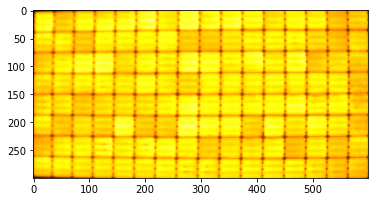

In [98]:
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

## Apply the tool to all the images

In [99]:
for path in tqdm(ann_paths):
    name = path.split('.')[0]
    image = cv.imread(im_dir+name+'.png')

    draw_rec(ann_dir+path, image, color, 3)
    cv.imwrite('./visualized_images/'+name+'.png', image)

100%|██████████| 18375/18375 [05:32<00:00, 55.35it/s]
